In [1]:
# RNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) 
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()


4.5.4


In [2]:
# Importing the dataset
dataset_train = pd.read_csv('apple.csv')
# Creating an numpy arrray of dataset
training_set = dataset_train.iloc[:,0:2]


In [3]:
training_set.iplot(kind='line',y='Open',x='Date')

In [4]:
# In 2014 apple divided their stock into 7 stocks 
training_set = dataset_train.iloc[1114:,0:2]
training_set.iplot(kind='line',y='Open',x='Date')

In [5]:
# feature scaling
training_set = dataset_train.iloc[1114:,1:2].values
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
training_set = mms.fit_transform(training_set)

In [6]:
X_train = []
y_train = []

# creating a time series:     use timesteps --> 80 
time_step = 20;
for i in range(time_step,len(training_set)):
    X_train.append(training_set[i-time_step:i,0])
    y_train.append(training_set[i,0])

#converting list into array
X_train = np.array(X_train);y_train = np.array(y_train)

# We know that LSTM layer takes 3 dimentional array
#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [7]:
X_train.shape

(628, 20, 1)

In [8]:
#Building an rnn

#importing the keras libraries
from keras.models import Sequential
from keras.layers import Dropout,Dense,LSTM


Using TensorFlow backend.


In [9]:
#adding layers
regressor = Sequential()
regressor.add(LSTM(units=200,return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [10]:
regressor.fit(X_train,y_train,epochs=200,batch_size=20)

Epoch 1/200
628/628 [==============================] - 4s 6ms/step - loss: 0.0561
Epoch 2/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0134
Epoch 3/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0117
Epoch 4/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 5/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0097
Epoch 6/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0087
Epoch 7/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0086
Epoch 8/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0072
Epoch 9/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 10/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0067
Epoch 11/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 12/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0058
Epoch 13/200


628/628 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 197/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 198/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 199/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 200/200
628/628 [==============================] - 2s 3ms/step - loss: 0.0024


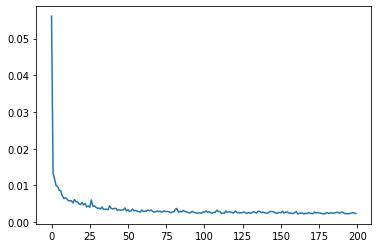

In [11]:
losses = regressor.history.history
losses = pd.DataFrame(losses)
losses['loss'].plot()

In [12]:
#predicing the future stocks
dataset_test  = pd.read_csv('real_testing.csv')
real_stocks = dataset_test['Open'].values

# for making time series
dataset_total = pd.concat([dataset_train['Open'],dataset_test['Open']],axis=0)

prediction_stocks = []
# creating a time series:     use timesteps --> 80 
for i in range(len(dataset_total)-20,len(dataset_total)):
    prediction_stocks.append(dataset_total[i-time_step:i])
    
#converting list into array
prediction_stocks = np.array(prediction_stocks)
prediction_stocks = mms.transform(prediction_stocks)
prediction_stocks = np.reshape(prediction_stocks,(prediction_stocks.shape[0],prediction_stocks.shape[1],1))
predictions = regressor.predict(prediction_stocks)
predictions = mms.inverse_transform(predictions)


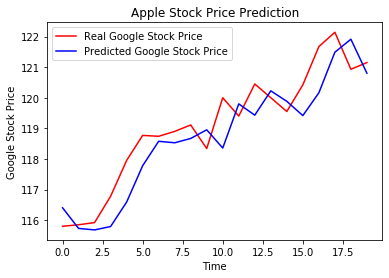

In [14]:
#visulising the results
plt.plot(real_stocks, color = 'red', label = 'Real Google Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [49]:
R = pd.DataFrame(real_stocks)
P = pd.DataFrame(predictions)
Data = pd.concat([R,P],axis=1)

In [58]:
Data.columns=['RealStocks','PredictedStocks']

In [60]:
Data[['RealStocks','PredictedStocks']].iplot(kind='spread')

C:\Users\hp\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\hp\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [59]:
Data.columns

Index(['RealStocks', 'PredictedStocks'], dtype='object')